In [2]:
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup as bts
import pandas as pd 
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

In [3]:
def getAndParseURL(url):
    result=requests.get(url,headers={"User-Agent":"Chrome/111.0.5563.65"})
    soup=bts(result.text,"html.parser")
    return soup

In [4]:
pages=["https://www.homegate.ch/rent/apartment/city-zurich/matching-list"]
for page in range(2,25):
    pages.append("https://www.homegate.ch/rent/apartment/city-zurich/matching-list?ep=" +str (page))
    
pages

['https://www.homegate.ch/rent/apartment/city-zurich/matching-list',
 'https://www.homegate.ch/rent/apartment/city-zurich/matching-list?ep=2',
 'https://www.homegate.ch/rent/apartment/city-zurich/matching-list?ep=3',
 'https://www.homegate.ch/rent/apartment/city-zurich/matching-list?ep=4',
 'https://www.homegate.ch/rent/apartment/city-zurich/matching-list?ep=5',
 'https://www.homegate.ch/rent/apartment/city-zurich/matching-list?ep=6',
 'https://www.homegate.ch/rent/apartment/city-zurich/matching-list?ep=7',
 'https://www.homegate.ch/rent/apartment/city-zurich/matching-list?ep=8',
 'https://www.homegate.ch/rent/apartment/city-zurich/matching-list?ep=9',
 'https://www.homegate.ch/rent/apartment/city-zurich/matching-list?ep=10',
 'https://www.homegate.ch/rent/apartment/city-zurich/matching-list?ep=11',
 'https://www.homegate.ch/rent/apartment/city-zurich/matching-list?ep=12',
 'https://www.homegate.ch/rent/apartment/city-zurich/matching-list?ep=13',
 'https://www.homegate.ch/rent/apartmen

In [5]:
links = []
for page in pages:
    html = getAndParseURL(page)
    for resulthf in html.findAll("a",{"class":"ListItem_itemLink_30Did"}):
        links.append("https://www.homegate.ch" + resulthf.get("href"))

links


['https://www.homegate.ch/rent/3002579447',
 'https://www.homegate.ch/rent/3002627862',
 'https://www.homegate.ch/rent/3002621121',
 'https://www.homegate.ch/rent/3002538579',
 'https://www.homegate.ch/rent/3002651586',
 'https://www.homegate.ch/rent/3002649462',
 'https://www.homegate.ch/rent/3002626815',
 'https://www.homegate.ch/rent/3002576286',
 'https://www.homegate.ch/rent/3002478233',
 'https://www.homegate.ch/rent/3002584237',
 'https://www.homegate.ch/rent/3002616431',
 'https://www.homegate.ch/rent/3002555028',
 'https://www.homegate.ch/rent/3002647733',
 'https://www.homegate.ch/rent/3002197688',
 'https://www.homegate.ch/rent/3002023120',
 'https://www.homegate.ch/rent/3002563698',
 'https://www.homegate.ch/rent/3002571659',
 'https://www.homegate.ch/rent/3002598423',
 'https://www.homegate.ch/rent/3000298918',
 'https://www.homegate.ch/rent/3002289931',
 'https://www.homegate.ch/rent/3002623140',
 'https://www.homegate.ch/rent/3002457300',
 'https://www.homegate.ch/rent/3

In [9]:
len(links)

420

In [8]:
ex=getAndParseURL("https://www.homegate.ch/rent/3000900797")

In [18]:
### rent price###
ex.find("ul",{"class":"SpotlightAttributes_spotlight_37lw3"}).find(text=re.compile("CHF")).findNext().text.replace(",","").replace(".","").replace("–","").strip()

'3310'

In [24]:
### Net area ###
ex.find("ul",{"class":"SpotlightAttributes_spotlight_37lw3"}).find(text=re.compile("Living")).findNext().text.replace("m2","").strip()

'40'

In [36]:
### Room Num ###
ex.find("ul",{"class":"SpotlightAttributes_spotlight_37lw3"}).find(text=re.compile("Room")).findNext().text.strip()

'2.5'

In [34]:
### add expenses###
ex.find("div",{"data-test":"costs"}).find(text=re.compile("expenses")).findNext().text.replace("CHF","").replace(".","").replace("–","").strip()

'230'

In [26]:
### Location Info ###
ex.find("span",{"class":"AddressDetails_street_22a5p"}).text.strip()

'Kalkbreitestrasse 41,'

In [29]:
### Flat type###
ex.find("div",{"class":"CoreAttributes_coreAttributes_2UrTf"}).find(text=re.compile("Type")).findNext().text.strip()

'Apartment'

In [37]:
result = []
for resulthf in links:
    html = getAndParseURL(resulthf)
    
    try:
        location = html.find("span",{"class":"AddressDetails_street_22a5p"}).text.strip()
    except:
        location = np.nan
    try:
        rent = html.find("ul",{"class":"SpotlightAttributes_spotlight_37lw3"}).find(text=re.compile("CHF")).findNext().text.replace(",","").replace(".","").replace("–","").strip()
    except:
        rent = np.nan
    try:
        add_expenses = html.find("div",{"data-test":"costs"}).find(text=re.compile("expenses")).findNext().text.replace("CHF","").replace(".","").replace("–","").strip()
    except:
        add_expenses = np.nan
    try:
        bedroom = html.find("ul",{"class":"SpotlightAttributes_spotlight_37lw3"}).find(text=re.compile("Room")).findNext().text.strip()
    except:
        bedroom = np.nan
    try:
        net_area = html.find("ul",{"class":"SpotlightAttributes_spotlight_37lw3"}).find(text=re.compile("Living")).findNext().text.replace("m2","").strip()
    except:
        net_area = np.nan
    try:
        flat_type = html.find("div",{"class":"CoreAttributes_coreAttributes_2UrTf"}).find(text=re.compile("Type")).findNext().text.strip()
    except:
        flat_type = np.nan
    time.sleep(2)
    
    result.append([location,rent,add_expenses,bedroom,net_area,flat_type])
    
columns=["Location","Rent","Additional Expenses","Bedroom","Net Area","Type"]
df = pd.DataFrame.from_records(result, columns=columns)

In [38]:
df

,Location,Rent,Additional Expenses,Bedroom,Net Area,Type
0,"Badenerstr. 157,",4475,250,3.5,102,Apartment
1,"Germaniastr. 64,",5850,420,5.5,143,Apartment
2,"Rotbuchstrasse,",1100,NaN,1,22,Studio
3,"Rainstr. 26,",NaN,NaN,5.5,209,Duplex
4,"Kraftstrasse 37,",7150,400,3.5,135,Apartment
...,...,...,...,...,...,...
415,NaN,NaN,NaN,NaN,NaN,NaN
416,NaN,NaN,NaN,NaN,NaN,NaN
417,"Birmensdorferstrasse 593,",995,NaN,1,13,Apartment
418,"Wiedingstrasse 30,",5304,NaN,5.5,160,Apartment


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Location             258 non-null    object
 1   Rent                 269 non-null    object
 2   Additional Expenses  170 non-null    object
 3   Bedroom              265 non-null    object
 4   Net Area             241 non-null    object
 5   Type                 273 non-null    object
dtypes: object(6)
memory usage: 19.8+ KB


In [40]:
df.to_csv("zrch_first.csv")

In [105]:
df=pd.read_csv("zrch_first.csv")

In [73]:
df

,Unnamed: 0,Location,Rent,Additional Expenses,Bedroom,Net Area,Type
0,0,"Badenerstr. 157,",4475.0,250.0,3.5,102.0,Apartment
1,1,"Germaniastr. 64,",5850.0,420.0,5.5,143.0,Apartment
2,2,"Rotbuchstrasse,",1100.0,NaN,1.0,22.0,Studio
3,3,"Rainstr. 26,",NaN,NaN,5.5,209.0,Duplex
4,4,"Kraftstrasse 37,",7150.0,400.0,3.5,135.0,Apartment
...,...,...,...,...,...,...,...
415,415,NaN,NaN,NaN,NaN,NaN,NaN
416,416,NaN,NaN,NaN,NaN,NaN,NaN
417,417,"Birmensdorferstrasse 593,",995.0,NaN,1.0,13.0,Apartment
418,418,"Wiedingstrasse 30,",5304.0,NaN,5.5,160.0,Apartment


In [7]:
df["Rent"].unique()

array(['44750', '58500', '11000', 'nan', '71500', '23300', '29000',
       '35000', '56600', '19000', '22280', '24200', '150000', '29800',
       '31000', '34850', '34900', '35500', '39500', '45000', '51800',
       '53000', '98000', '21000', '21500', '24830', '26800', '28500',
       '29500', '33500', '34300', '38500', '49550', '49750', '51000',
       '64500', '10600', '15000', '16900', '18800', '20500', '22000',
       '25800', '25900', '27300', '29600', '29900', '30300', '31850',
       '33100', '34100', '34500', '36100', '37100', '38100', '40000',
       '40800', '50800', '58100', '4800', '12000', '12900', '13000',
       '15190', '15900', '19500', '23900', '26600', '27000', '28000',
       '31400', '37830', '38600', '46500', '53500', '19360', '24500',
       '27400', '27500', '28800', '32900', '33000', '34800', '75200',
       '24950', '48920', '17900', '18200', '23500', '52900', '90000',
       '24800', '26900', '32500', '34950', '40300', '42500', '62000',
       '99000', '16450

In [106]:
df["Rent"]=df["Rent"].apply(lambda x : 2625 if x =="nan" else x )
df["Rent"]=df["Rent"].astype(str)
df["Rent"] = df["Rent"].str.replace(".", "")

C:\Users\User\AppData\Local\Temp\ipykernel_17384\758222523.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Rent"] = df["Rent"].str.replace(".", "")


In [108]:
df["Rent"]=df["Rent"].astype(str)
df["Rent"]=df["Rent"].str[:4]

In [107]:
df["Rent"]=df["Rent"].apply(lambda x : 2625 if x =='nan' else x )

In [109]:
df["Rent"]=df["Rent"].astype(int)

In [110]:
df["Rent"].mean()

2938.9261904761906

In [16]:
df["Additional Expenses"].unique()

array([250., 420.,  nan, 400., 230., 190., 500., 270., 260., 180., 200.,
       150., 290., 300., 380., 240., 317., 160., 440., 345., 140.,  70.,
       120., 220., 280.,  30., 110.,  90., 210., 145., 570., 360., 350.,
       155., 195., 215., 170., 225., 100., 187., 325., 310., 390., 430.,
       340., 130., 285., 600., 370., 235., 205., 320., 115.])

In [79]:
df["Additional Expenses"]=df["Additional Expenses"].fillna(250)
df["Additional Expenses"]=df["Additional Expenses"].astype(int)
df["Additional Expenses"].mean()

248.5690476190476

In [117]:
df["Bedroom"].unique()

array(['3', '5', '1', '4', '2', nan, '6'], dtype=object)

In [112]:
df["Bedroom"]=df["Bedroom"].astype(str)

In [113]:
df["Bedroom"]=df["Bedroom"].str[:1]

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           420 non-null    int64  
 1   Location             258 non-null    object 
 2   Rent                 420 non-null    int32  
 3   Additional Expenses  420 non-null    int32  
 4   Bedroom              265 non-null    object 
 5   Net Area             241 non-null    float64
 6   Type                 273 non-null    object 
dtypes: float64(1), int32(2), int64(1), object(3)
memory usage: 19.8+ KB


In [119]:
df["Bedroom"].value_counts()

2    87
3    73
1    61
4    34
5     9
6     1
Name: Bedroom, dtype: int64

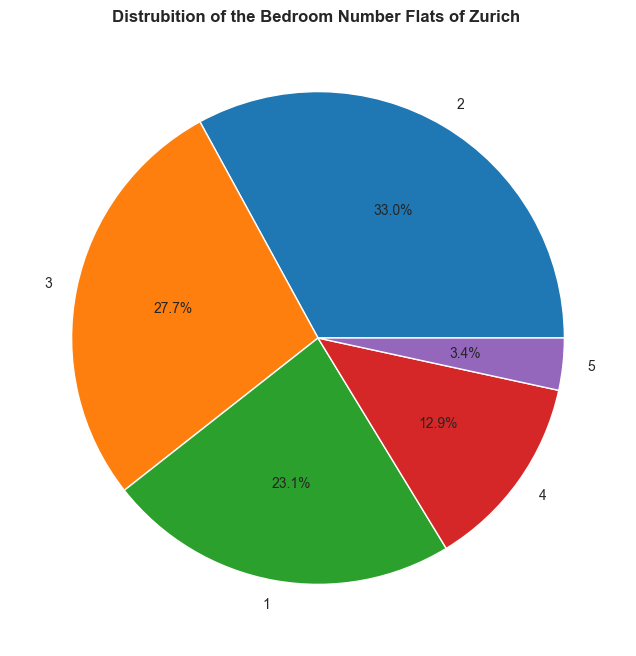

In [121]:
# get the value counts of the 'Bedroom' column
bed_room_counts = df['Bedroom'].value_counts()

# filter the value counts to include only values bigger than 1%
filtered_bedroom_counts = bed_room_counts[bed_room_counts/len(df) > 0.01]


# create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_bedroom_counts, labels=filtered_bedroom_counts.index, autopct='%1.1f%%')

# set the title of the chart
plt.title('Distrubition of the Bedroom Number Flats of Zurich ',weight="bold")

# display the chart
plt.show();


In [103]:
df["Bedroom"].unique()

array([None], dtype=object)

In [115]:
df["Bedroom"]=df["Bedroom"].apply(lambda x : 0 if x =="n" else x)

In [116]:
df["Bedroom"] = df["Bedroom"].loc[df["Bedroom"] != 0]

In [122]:
df["Bedroom"]=df["Bedroom"].fillna(0)
df["Bedroom"]=df["Bedroom"].astype(int)

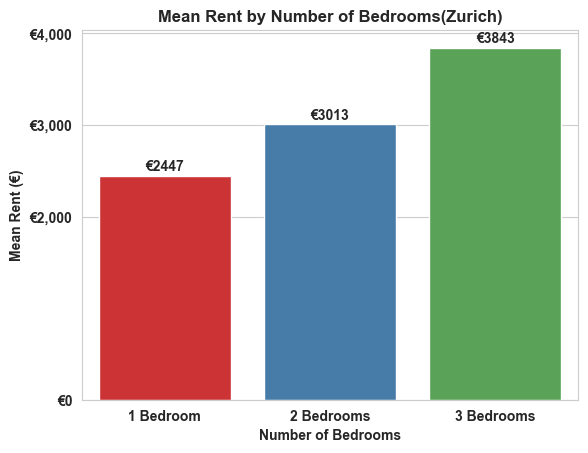

In [123]:
### Calculate mean rent for each group + add expenses ###
one_bed_mean_rent = df[df['Bedroom'] == 1]['Rent'].mean()+248
two_bed_mean_rent = df[df['Bedroom'] == 2]['Rent'].mean()+248
three_bed_mean_rent = df[df['Bedroom'] == 3]['Rent'].mean()+248

### Create a bar plot ###
sns.set_style("whitegrid")
ax = sns.barplot(x=['1 Bedroom', '2 Bedrooms','3 Bedrooms'], y=[one_bed_mean_rent, two_bed_mean_rent,three_bed_mean_rent], palette="Set1")

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height+50, '€{:.0f}'.format(height), ha="center", weight='bold')

# Format the x and y-axis tick labels
ax.set_xticklabels(['1 Bedroom', '2 Bedrooms','3 Bedrooms'], weight='bold')
ax.set_yticks([0, 2000, 3000,4000])
ax.set_yticklabels(['€0', '€2,000', '€3,000','€4,000'], weight='bold')

# Format the x and y-axis labels
ax.set_xlabel('Number of Bedrooms', weight='bold')
ax.set_ylabel('Mean Rent (€)', weight='bold')

# Set the plot title
ax.set_title('Mean Rent by Number of Bedrooms(Zurich)', weight='bold')

plt.show();